# Engineering Calculations in Python: A Beginner's Guide

This example runs through a basic Python code snippet for calculating and plotting the shear force and bending moment diagrams for a beam under a uniformly distributed load.
There are many things happening in this example that require an understanding of Python syntax and plotting libraries but the intent is to show you a familiar situation so you can calibrate yourself with what's involved.

I will cover this in more detail when we begin the courses. But there's enough ammo here to begin experimenting with other formulas.

## Step 1: Define Beam Parameters

```python
length = 10  # Length of the beam (m)
w = 10  # Uniformly distributed load in kN/m 
```
These lines set the foundational parameters: the beam's length and the magnitude of the load it carries.

## Step 2: Function Definitions
```python
def shear_force(x):
    return w * (length / 2 - x)  # kN

def bending_moment(x):
    return (w * x / 2) * (length - x)  # kNm
```
Functions to calculate the shear force and bending moment at any point x along the beam, incorporating basic beam theory.  

## Step 3: Maximum Values Calculation

```python
V_max = w * length / 2  # Maximum shear force
M_max = w * length ** 2 / 8  # Maximum bending moment
```
Calculates maximum shear force and bending moment, highlighting the critical points for structural analysis.

## Step 4: Generating Points for Plotting
```python
x_values = np.linspace(0, length, 100)
```

Generates a series of points along the beam to evaluate the shear force and bending moment.

## Step 5: Plotting Diagrams
The plotting is done in two main parts, using matplotlib:

* Shear Force Diagram (SFD)
* Bending Moment Diagram (BMD)
```python
plt.figure(figsize=(12, 6))
```

Sets up the plotting environment.

### SFD Plotting
```python
plt.subplot(1, 2, 1)
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
```
Visualizes shear forces along the beam, with shading for emphasis.

### BMD Plotting
```python
plt.subplot(1, 2, 2)
plt.plot(x_values, bm_values, color='red', label='Bending Moment (Mx)', lw=2)
plt.fill_between(x_values, 0, bm_values, color='salmon', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
```
Illustrates bending moments, similarly enhanced with shading.

## Step 6: Axis and Labels
Each plot is labeled with titles, axis labels, and grids for clarity.

```python
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (kN)')
plt.grid(True)
plt.legend()
```
Adds informative labels and a legend to the plot.

Maximum Shear Force: 50.0 kN
Maximum Bending Moment: 125.0 kNm


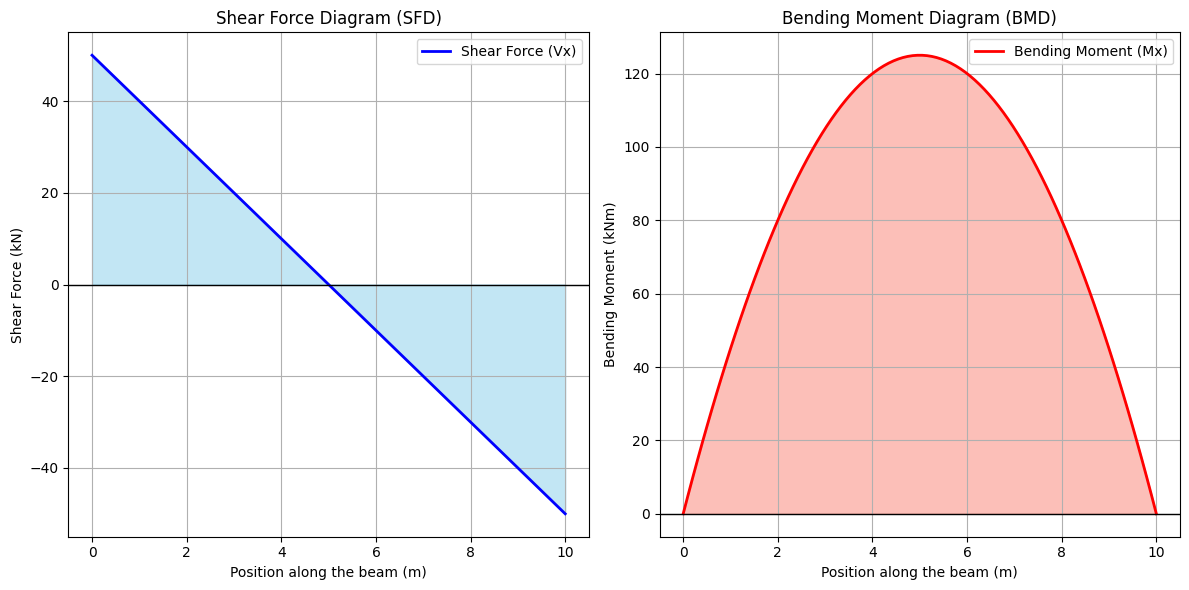

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Beam parameters
length = 10  # Length of the beam (m)
w = 10  # Uniformly distributed load in kN/m 

# Functions
def shear_force(x):
    return w * (length / 2 - x)  # kN

def bending_moment(x):
    return (w * x / 2) * (length - x)  # kNm

# Maximum shear force calculation
V_max = w * length / 2  # The maximum shear force at the ends of the beam

# Maximum bending moment calculation
M_max = w * length ** 2 / 8  # The maximum bending moment at the midpoint of the beam

print(f"Maximum Shear Force: {V_max} kN")
print(f"Maximum Bending Moment: {M_max} kNm")

# Generating points for plotting
x_values = np.linspace(0, length, 100)
sf_values = [shear_force(x) for x in x_values]
bm_values = [bending_moment(x) for x in x_values]

# Plotting SFD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (kN)')
plt.grid(True)
plt.legend()

# Plotting BMD
plt.subplot(1, 2, 2)
plt.plot(x_values, bm_values, color='red', label='Bending Moment (Mx)', lw=2)
plt.fill_between(x_values, 0, bm_values, color='salmon', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
plt.title('Bending Moment Diagram (BMD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Bending Moment (kNm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


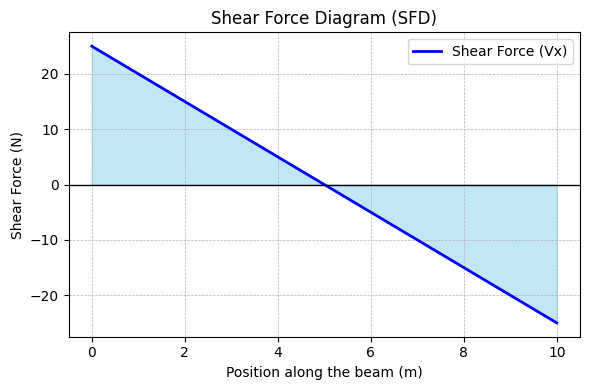

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Beam parameters
length = 10  # Length of the beam in meters
w = 500  # Uniformly distributed load in N/m

# Shear force function
def shear_force(x):
    return w * (length / 2 - x)

# Generating points for plotting
x_values = np.linspace(0, length, 100)
sf_values = [shear_force(x) for x in x_values]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')  # Plotting SFD with a full boundary line

# Shading under the SFD
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)

# Drawing the beam as a horizontal reference line
plt.axhline(0, color='black', lw=1)  # Beam axis

# Enhancements
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (N)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# SymBeam examples suit
# ==========================================================================================
#                                                      António Carneiro <amcc@fe.up.pt> 2020
# Features: 1. Numeric length
#           2. Roller
#           3. Hinge
#           4. Fixed
#           5. Numeric distributed constant load
#           6. Numeric distributed quadratic load

import matplotlib.pyplot as plt

from symbeam import beam


test_beam = beam(4, x0=0)
test_beam.add_support(0, "roller")
test_beam.add_support(1, "hinge")
test_beam.add_support(4, "fixed")
test_beam.add_distributed_load(0, 2, "-5")
test_beam.add_distributed_load(2, 4, "-(4*x**2 - 24 *x + 37)")
test_beam.solve()
fig, ax = test_beam.plot()

plt.savefig(__file__.split(".py")[0] + ".svg")

c:\Users\jorei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


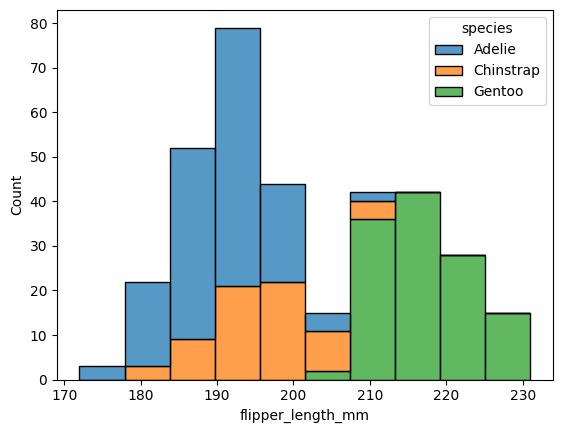

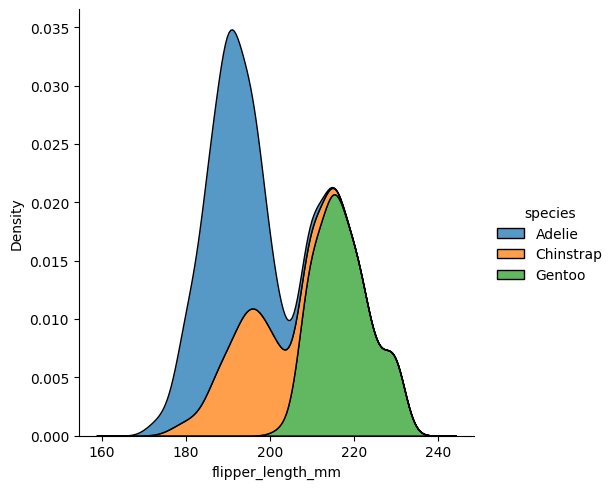

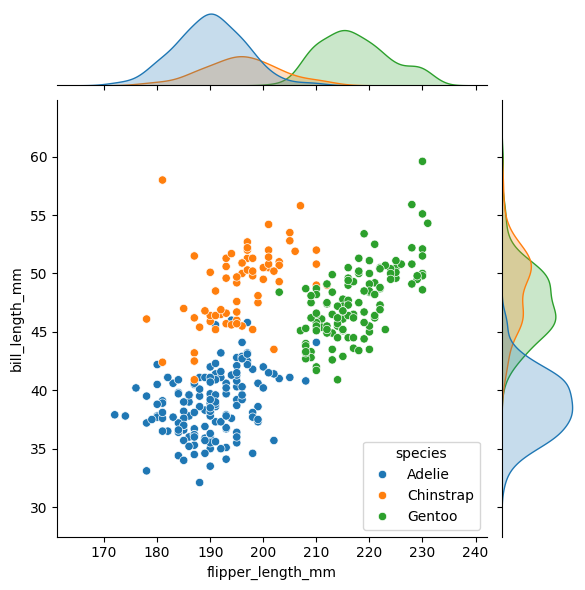

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

c:\Users\jorei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


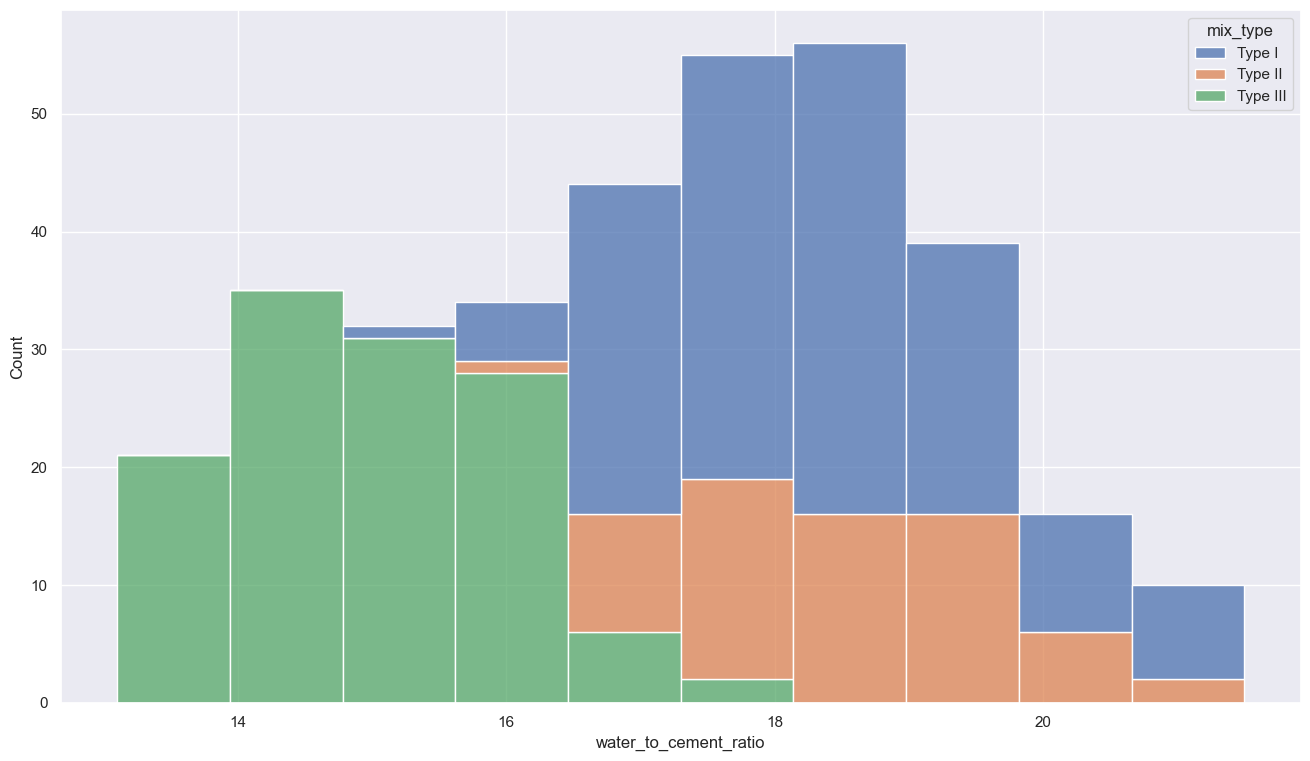

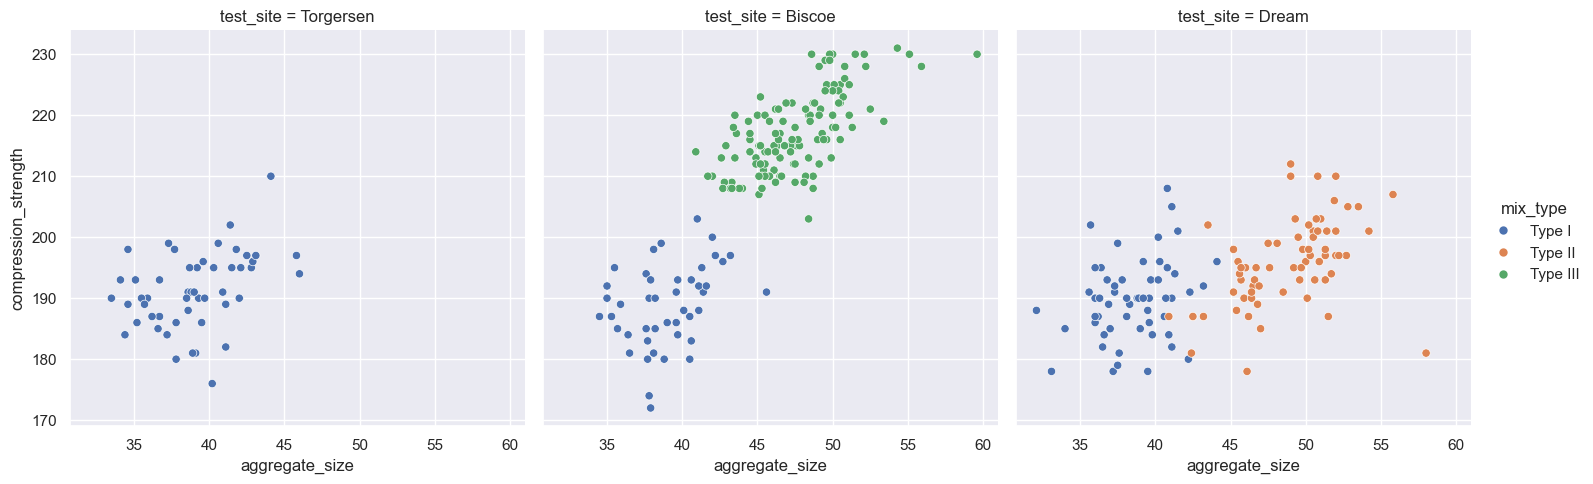

In [2]:
import seaborn as sns
import pandas as pd

# Load the dataset
concrete_data = sns.load_dataset("penguins")  # Pretend this dataset is about concrete samples
# Set default figure size to 4.5x8 inches for a 9:16 aspect ratio
sns.set(rc={"figure.figsize": (16, 9)})


# Rename columns to fit concrete hardness testing context more accurately
concrete_data = concrete_data.rename(columns={
    'species': 'mix_type', 
    'island': 'test_site',
    'bill_length_mm': 'aggregate_size',  # Adjusted for a more relevant concrete testing attribute
    'bill_depth_mm': 'water_to_cement_ratio',  # Adjusted for a critical quality factor
    'flipper_length_mm': 'compression_strength',
    'body_mass_g': 'curing_time'
})

concrete_mixes = ['Type I', 'Type II', 'Type III', 'Type IV']

mix_type_mapping = {
    'Adelie': 'Type I',
    'Chinstrap': 'Type II',
    'Gentoo': 'Type III'  # Additional mix types can be added for a larger dataset
}

# Apply the mapping to the 'mix_type' column
concrete_data['mix_type'] = concrete_data['mix_type'].replace(mix_type_mapping) 

# Adjust data ranges if needed, such as converting curing time or calibrating compression strength units

# This updated dataset now accurately reflects variables influencing concrete's hardness and quality

sns.histplot(data=concrete_data, x="water_to_cement_ratio", hue="mix_type", multiple="stack")
sns.relplot(data=concrete_data, x="aggregate_size", y="compression_strength", hue="mix_type", col="test_site")
# ... and more visualizations relevant to the detailed aspects of concrete testing!

concrete_properties = concrete_data  # Use this dataset for concrete-related engineering calculations


c:\Users\jorei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Aggregate Size vs. Water to Cement Ratio by Mix Type')

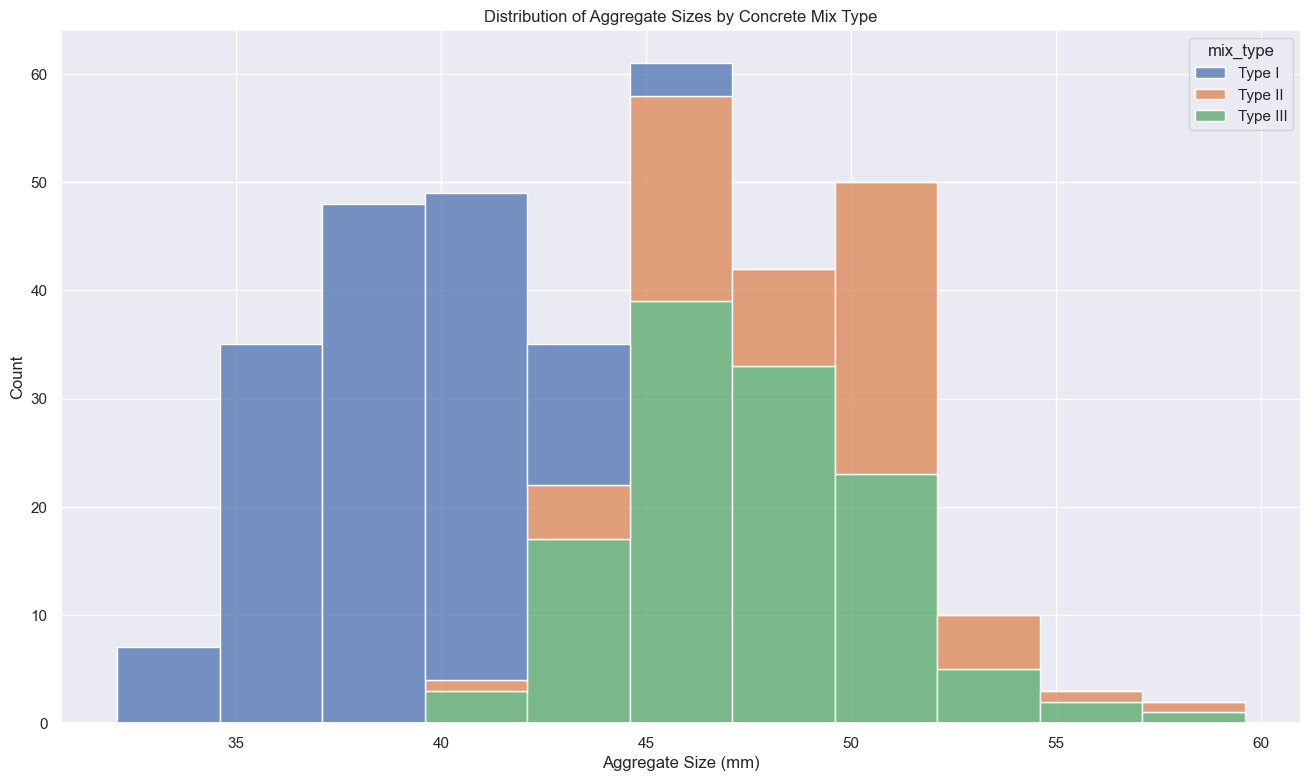

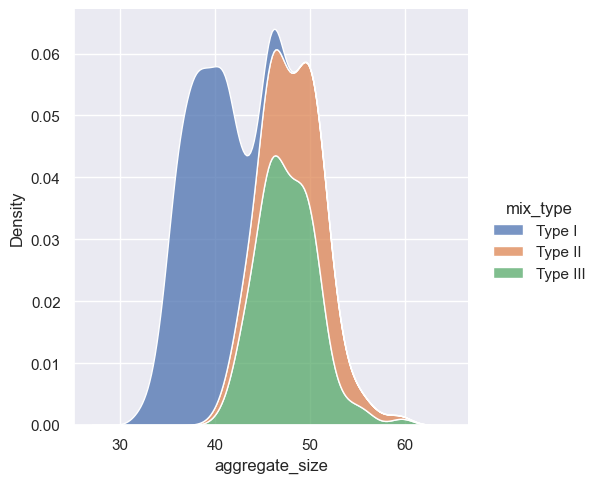

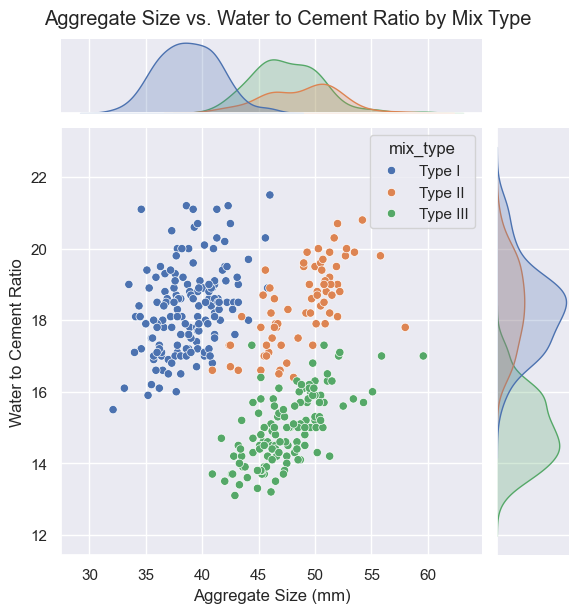

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set default figure size to 4.5x8 inches for a 9:16 aspect ratio
plt.rcParams['figure.figsize'] = (16, 9)

# Assuming concrete_properties is our modified dataset
sns.histplot(data=concrete_properties, x="aggregate_size", hue="mix_type", multiple="stack")


# Customization:
plt.xlabel("Aggregate Size (mm)")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Sizes by Concrete Mix Type")

sns.displot(data=concrete_properties, x="aggregate_size", hue="mix_type", multiple="stack", kind="kde")

sns.jointplot(data=concrete_properties, x="aggregate_size", y="water_to_cement_ratio", hue="mix_type")

# Customization for jointplot:
plt.xlabel("Aggregate Size (mm)")
plt.ylabel("Water to Cement Ratio")
plt.suptitle("Aggregate Size vs. Water to Cement Ratio by Mix Type", y=1.02)  # Adjusting title position

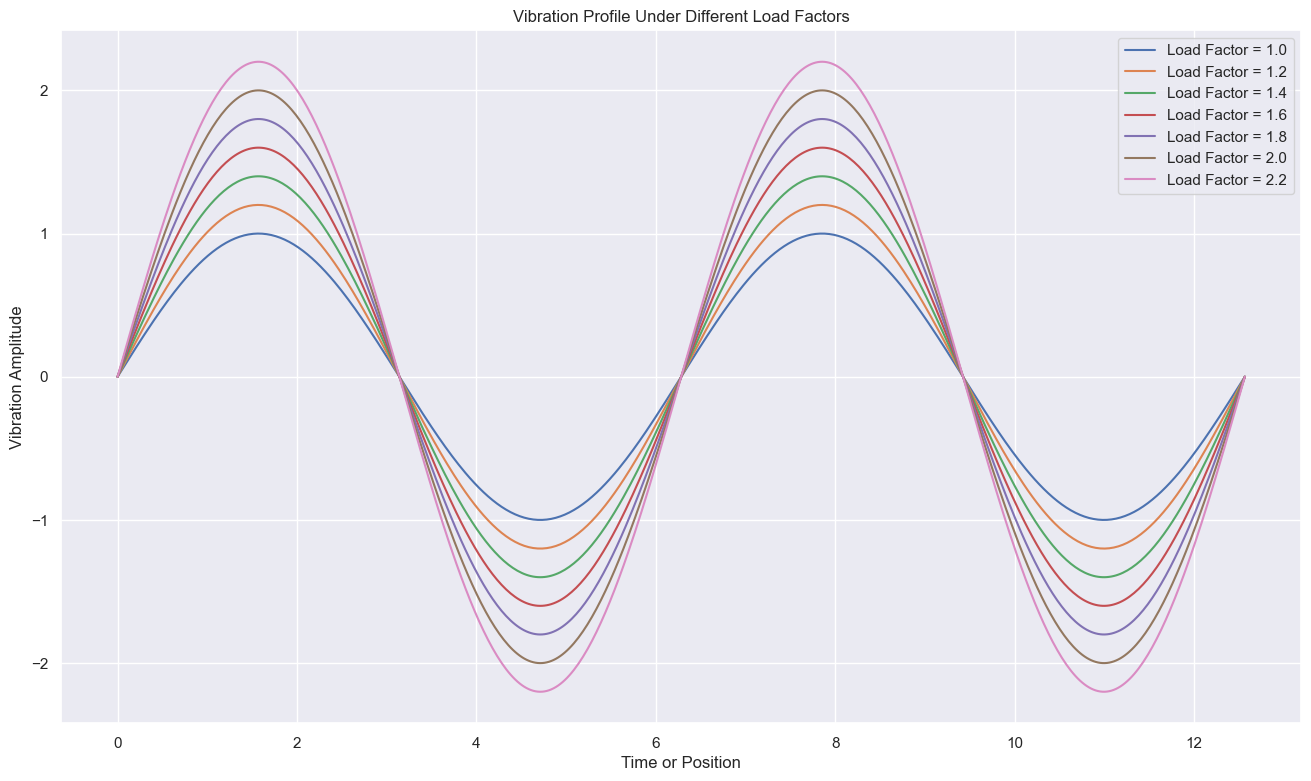

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scenario for vibration analysis
x = np.linspace(0, 4 * np.pi, 500)  # Time or position
operating_conditions = np.arange(1, 2.2, 0.2)  # Represents different operating amplitudes, e.g., speeds or loads

# Plot vibrations under different operating conditions
[plt.plot(x, condition * np.sin(x), label=f'Load Factor = {condition:.2}') for condition in operating_conditions]

# Customizing the plot for engineering context
plt.title('Vibration Profile Under Different Load Factors')
plt.xlabel('Time or Position')
plt.ylabel('Vibration Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Explaining the SDOF System Motion Visualization

To understand the motion of a Single Degree of Freedom (SDOF) system in structural dynamics, we utilize a simple harmonic motion equation, which is a foundational concept in the study of vibrational systems. The equation for the motion of an undamped SDOF system under free vibration is given by:

\[ y(t) = A \sin(\omega t + \phi) \]

where:

- \(y(t)\) is the displacement of the system at time \(t\),
- \(A\) is the amplitude of vibration,
- \(\omega\) is the natural frequency of the system (in radians per second),
- \(\phi\) is the phase angle at \(t = 0\), and
- \(t\) is time.

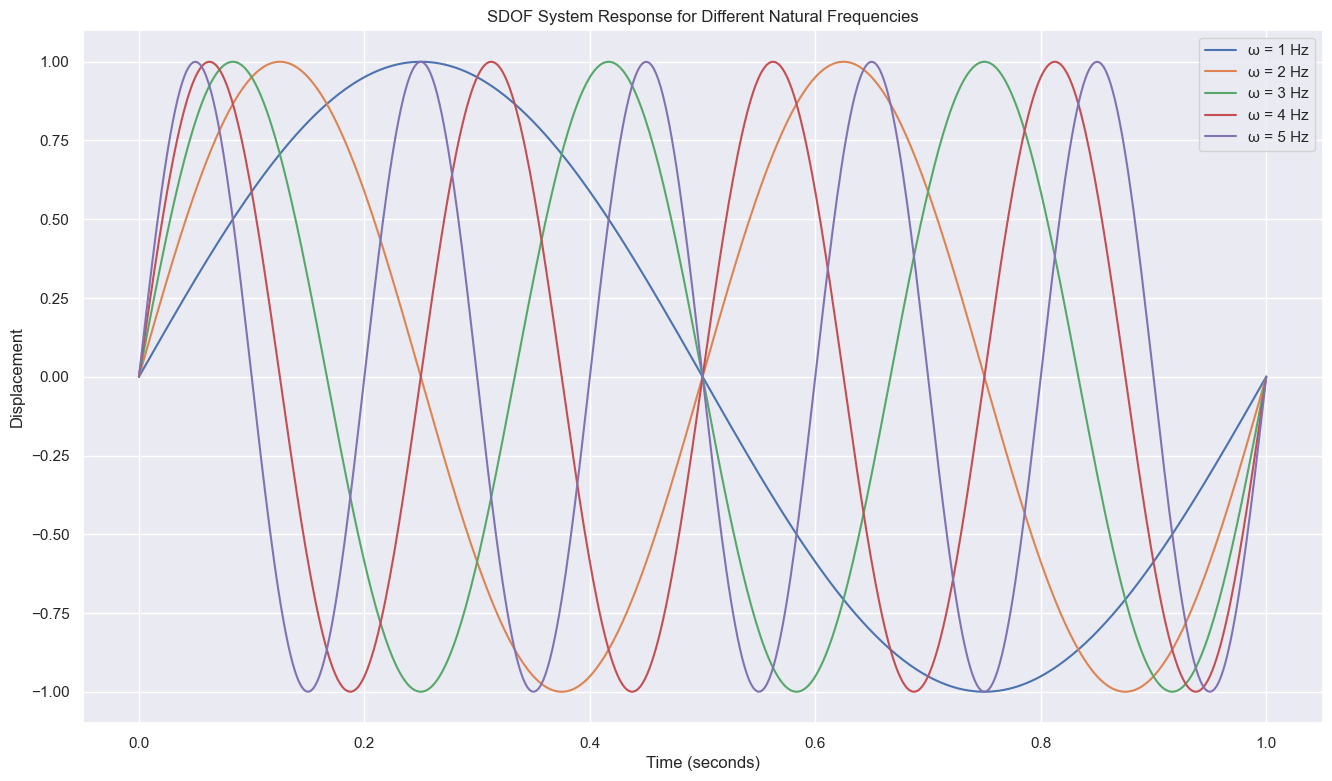

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 1, 500)  # 10 seconds, 500 points

# Parameters for SDOF system
A = 1  # Amplitude
phi = 0  # Phase angle, in radians
natural_frequencies = [1, 2, 3, 4, 5]  # Different natural frequencies (Hz)

# Plot the response for different natural frequencies
for omega in natural_frequencies:
    y = A * np.sin(2 * np.pi * omega * t + phi)
    plt.plot(t, y, label=f'ω = {omega} Hz')

# Customize the plot
plt.title('SDOF System Response for Different Natural Frequencies')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)
plt.show()
